In [24]:
import numpy as np
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from matplotlib.dates import DateFormatter
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted



In [172]:
df = pd.read_csv("Work Term Report Data.csv")
df.head()


,Date,Barcelona_Fabra Daily Rainfall [mm],Barcelona Daily Rainfall [mm],Sabadell_Aero Daily Rainfall [mm],Garriga Discharge [m^3],Castellar Discharge [m^3],Llica Discharge [m^3],Montornes Discharge [m^3],Mogoda Discharge [m^3],Gramenet Discharge [m^3]
0,1/1/2003,0.0,0.0,0.0,0.254,0.0327,0.155,0.3985,0.120,3.6275
1,1/2/2003,0.0,0.0,NaN,0.254,0.0281,0.151,0.3745,0.106,3.9471
2,1/3/2003,0.0,0.0,NaN,0.246,0.0225,0.145,0.3750,0.101,4.0174
3,1/4/2003,0.0,0.0,0.0,0.251,0.0300,0.145,0.3720,0.099,3.9316
4,1/5/2003,18.1,16.4,2.1,0.241,0.0328,0.146,0.3686,0.097,3.7913


In [3]:
plt.figure(figsize=(20, 60))

<Figure size 2000x6000 with 0 Axes>

<Figure size 2000x6000 with 0 Axes>

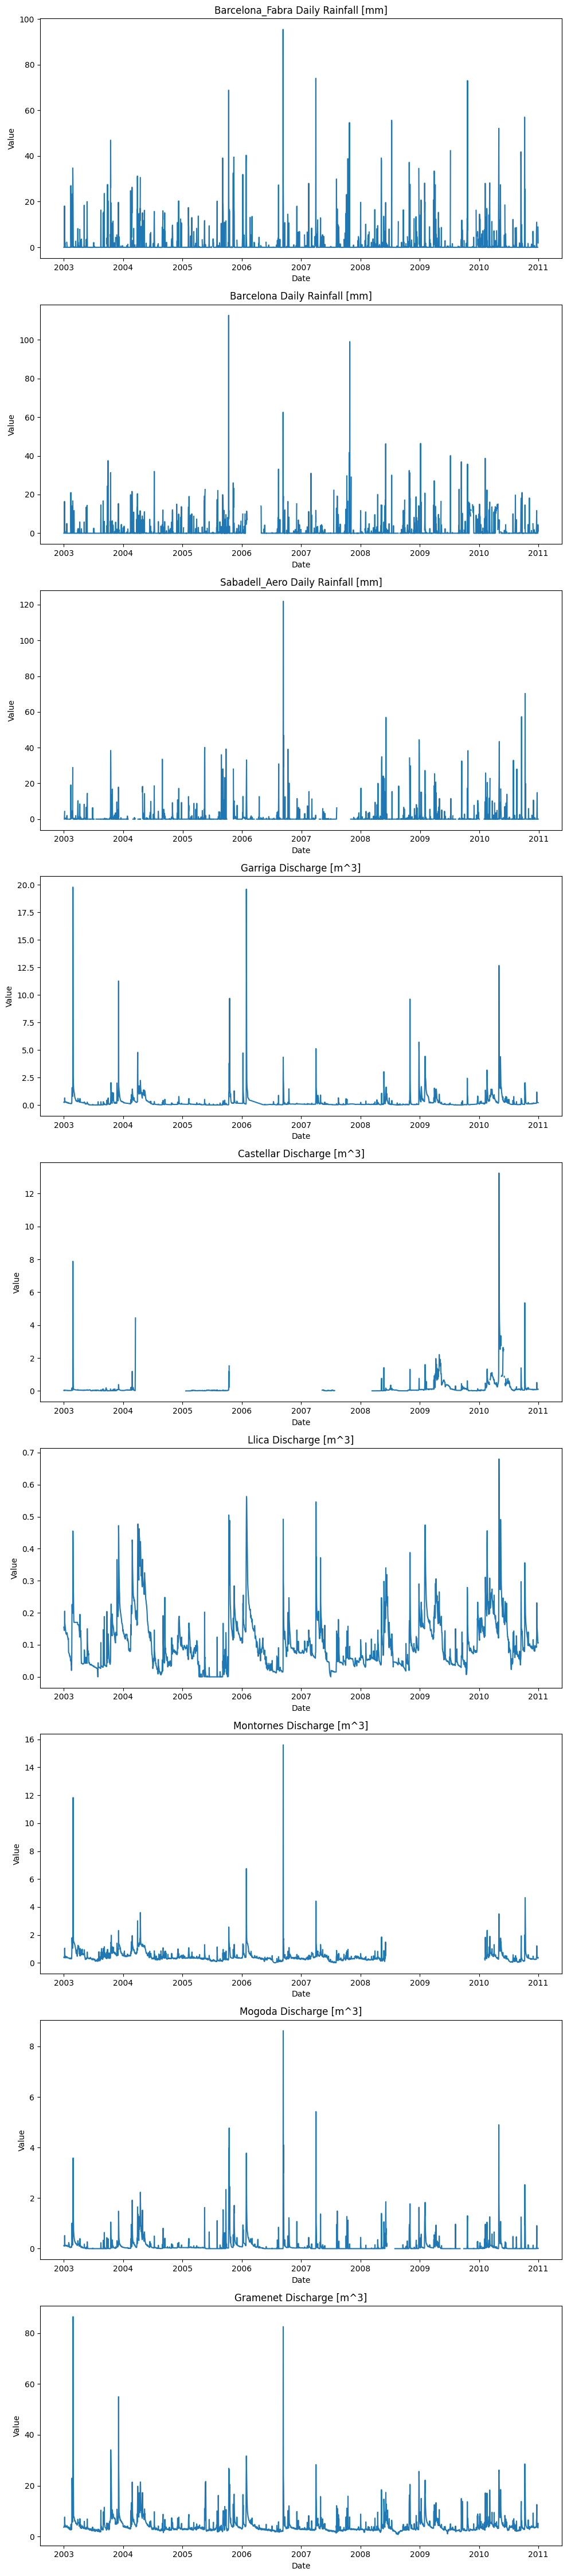

In [4]:
dates = pd.to_datetime(df.iloc[:,0])  # Convert the first column to datetime
num_cols = len(df.columns) - 1  # Number of columns to plot, excluding the first column

# Create subplots for each column
fig, axs = plt.subplots(num_cols, 1, figsize=(10, 5*num_cols))

# Plot each column as a separate plot
for i, col in enumerate(df.columns[1:]):
    axs[i].plot(dates, df[col])
    axs[i].set_title(col)
    axs[i].set_ylabel('Value')
    axs[i].set_xlabel('Date')

# Set the x-axis label for the last plot


# Adjust subplot spacing
fig.tight_layout()

# Show the plot
plt.show()

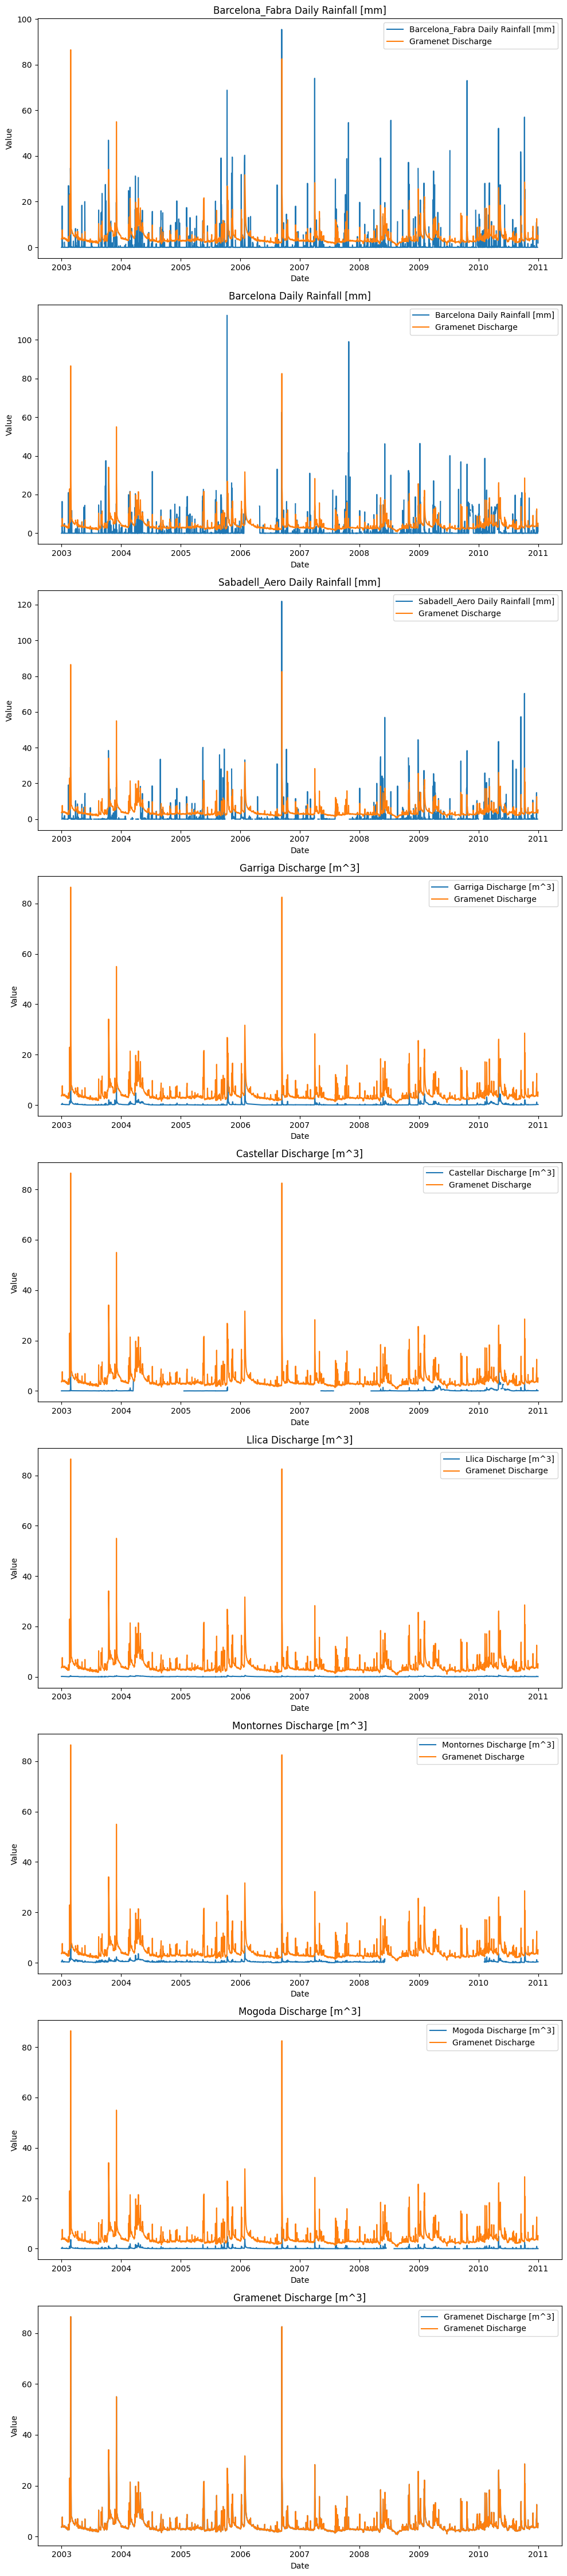

In [180]:
dates = pd.to_datetime(df.iloc[:,0])  # Convert the first column to datetime
num_cols = len(df.columns) - 1  # Number of columns to plot, excluding the first column

# Create subplots for each column
fig, axs = plt.subplots(num_cols, 1, figsize=(10, 5*num_cols))

# Plot each column as a separate plot
for i, col in enumerate(df.columns[1:]):
    axs[i].plot(dates, df[col], label=col)
    axs[i].set_title(col)
    axs[i].set_ylabel('Value')
    axs[i].set_xlabel('Date')
    
    axs[i].plot(dates, df.iloc[:, -1], label='Gramenet Discharge')
    axs[i].legend()

# Adjust subplot spacing
fig.tight_layout()
# Show the plot
plt.show()

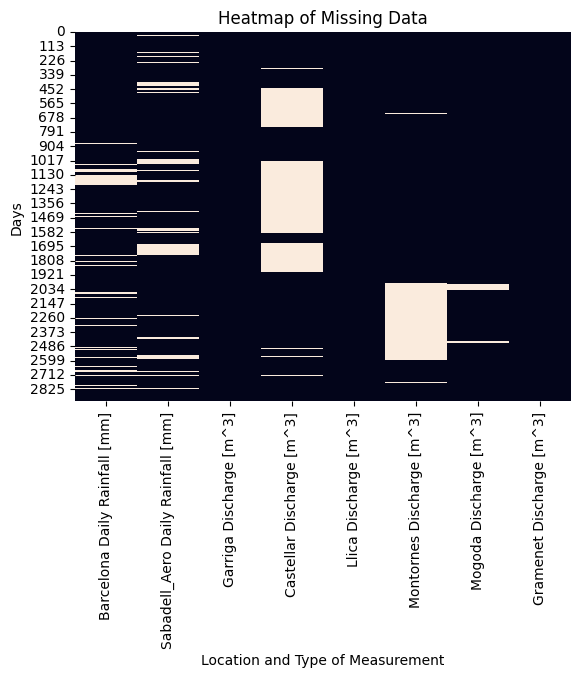

In [6]:
sns.heatmap(df.iloc[:,2:].isnull(), cbar=False)
plt.ylabel('Days')
plt.xlabel('Location and Type of Measurement')
plt.title('Heatmap of Missing Data')
plt.show()

In [7]:
df.drop('Castellar Discharge [m^3]', inplace = True, axis=1)
df.drop('Montornes Discharge [m^3]', inplace = True, axis=1)
df.head()


,Date,Barcelona_Fabra Daily Rainfall [mm],Barcelona Daily Rainfall [mm],Sabadell_Aero Daily Rainfall [mm],Garriga Discharge [m^3],Llica Discharge [m^3],Mogoda Discharge [m^3],Gramenet Discharge [m^3]
0,1/1/2003,0.0,0.0,0.0,0.254,0.155,0.120,3.6275
1,1/2/2003,0.0,0.0,NaN,0.254,0.151,0.106,3.9471
2,1/3/2003,0.0,0.0,NaN,0.246,0.145,0.101,4.0174
3,1/4/2003,0.0,0.0,0.0,0.251,0.145,0.099,3.9316
4,1/5/2003,18.1,16.4,2.1,0.241,0.146,0.097,3.7913


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 2922 non-null   object 
 1   Barcelona_Fabra Daily Rainfall [mm]  2679 non-null   float64
 2   Barcelona Daily Rainfall [mm]        2699 non-null   float64
 3   Sabadell_Aero Daily Rainfall [mm]    2516 non-null   float64
 4   Garriga Discharge [m^3]              2922 non-null   float64
 5   Llica Discharge [m^3]                2922 non-null   float64
 6   Mogoda Discharge [m^3]               2852 non-null   float64
 7   Gramenet Discharge [m^3]             2922 non-null   float64
dtypes: float64(7), object(1)
memory usage: 182.8+ KB


In [9]:
df.corr()

C:\Users\hocke\AppData\Local\Temp\ipykernel_9684\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Barcelona_Fabra Daily Rainfall [mm],Barcelona Daily Rainfall [mm],Sabadell_Aero Daily Rainfall [mm],Garriga Discharge [m^3],Llica Discharge [m^3],Mogoda Discharge [m^3],Gramenet Discharge [m^3]
Barcelona_Fabra Daily Rainfall [mm],1.000000,0.680609,0.806012,0.170962,0.202106,0.369651,0.330710
Barcelona Daily Rainfall [mm],0.680609,1.000000,0.646151,0.090237,0.126251,0.233462,0.201358
Sabadell_Aero Daily Rainfall [mm],0.806012,0.646151,1.000000,0.217428,0.178946,0.400147,0.338390
Garriga Discharge [m^3],0.170962,0.090237,0.217428,1.000000,0.611243,0.625492,0.757268
Llica Discharge [m^3],0.202106,0.126251,0.178946,0.611243,1.000000,0.612124,0.655422
Mogoda Discharge [m^3],0.369651,0.233462,0.400147,0.625492,0.612124,1.000000,0.802983
Gramenet Discharge [m^3],0.330710,0.201358,0.338390,0.757268,0.655422,0.802983,1.000000


In [10]:
df2 = df.copy(deep=True)

In [11]:
df = df.dropna()

In [12]:
df.info()
#Now we have clean data that can be used for the MLR analysis.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 2076 non-null   object 
 1   Barcelona_Fabra Daily Rainfall [mm]  2076 non-null   float64
 2   Barcelona Daily Rainfall [mm]        2076 non-null   float64
 3   Sabadell_Aero Daily Rainfall [mm]    2076 non-null   float64
 4   Garriga Discharge [m^3]              2076 non-null   float64
 5   Llica Discharge [m^3]                2076 non-null   float64
 6   Mogoda Discharge [m^3]               2076 non-null   float64
 7   Gramenet Discharge [m^3]             2076 non-null   float64
dtypes: float64(7), object(1)
memory usage: 146.0+ KB


In [13]:
x = df.drop(['Date', 'Gramenet Discharge [m^3]'], axis=1)
y = df['Gramenet Discharge [m^3]']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=101)

In [15]:
# Create a linear regression model and train it using the specified training data.
model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)

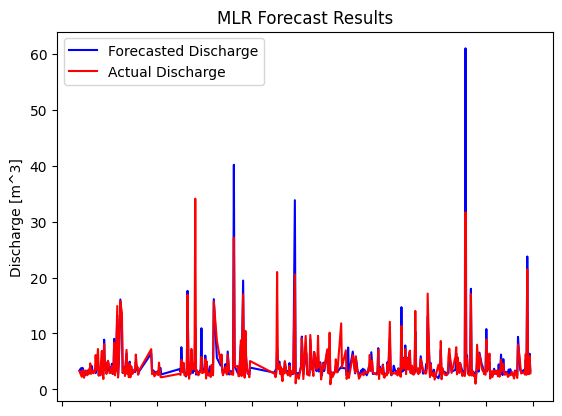

In [163]:
fig, ax = plt.subplots()

forecast_dates = pd.to_datetime(df['Date'][-len(predictions):])

# Plot the two columns against each other
ax.plot(forecast_dates, predictions, color='blue')
ax.set_ylabel('Discharge [m^3]')
ax.set_xticklabels([])
ax.plot(forecast_dates, y_test, color='red')

ax.legend(['Forecasted Discharge', 'Actual Discharge'])
plt.title('MLR Forecast Results')




# Show the plot
plt.show()


In [130]:
export = pd.DataFrame({'List1': y_test, 'List2': predictions})

# Save the dataframe to an Excel file
export.to_excel('my_lists.xlsx', index=False)

In [133]:
mlr_mse = sklearn.metrics.mean_squared_error(y_test, predictions, squared = False)
print(mlr_mse)
mlr_mae = sklearn.metrics.mean_absolute_error(y_test, predictions)
print(mlr_mae)

2.3824622880655144
0.8509254103634573


In [147]:
def sigmoid_activation(x):
    return 1/(1+np.exp(-x))

p = 6
N = 2076

1.90755786619104
0.8736766948413008
62


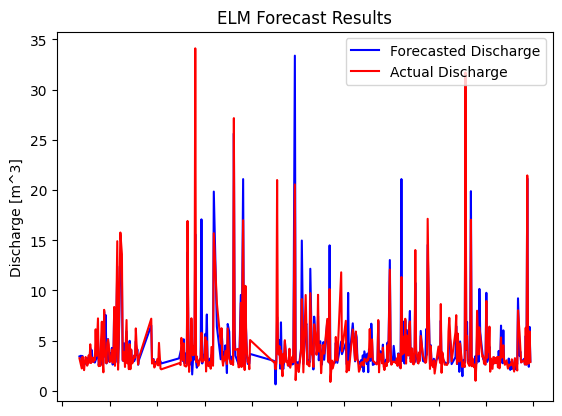

In [164]:
elm_mse_list = []
elm_mae_list = []
ELM_predictions_list = []

for i in range(100):
    W, b = np.random.random((p, i)), np.random.random(i)
    H = sigmoid_activation((x_train @ W) + b)                  # Step 2: Hidden layer output matrix
    beta_hat = np.linalg.pinv(H) @ y_train  

    H = sigmoid_activation((x_test @ W) + b)
    ELM_predictions = H @ beta_hat
    ELM_predictions_list.append(ELM_predictions)
    elm_mse = sklearn.metrics.mean_squared_error(y_test, ELM_predictions, squared = False)
    elm_mse_list.append(elm_mse)
    elm_mae = sklearn.metrics.mean_absolute_error(y_test, ELM_predictions)
    elm_mae_list.append(elm_mae)


print(min(elm_mse_list))
print(min(elm_mae_list))

min_mse_index = elm_mse_list.index(min(elm_mse_list))
min_mae_index = elm_mae_list.index(min(elm_mae_list))

min_overall_index = round((min_mse_index + min_mae_index)/2)

print(min_overall_index)

fig, ax = plt.subplots()

forecast_dates = pd.to_datetime(df['Date'][-len(predictions):])

# Plot the two columns against each other
ax.plot(forecast_dates, ELM_predictions_list[min_overall_index], color = 'blue')
ax.set_ylabel('Discharge [m^3]')
ax.set_xticklabels([])
ax.plot(forecast_dates, y_test, color='red')

ax.legend(['Forecasted Discharge', 'Actual Discharge'])
plt.title('ELM Forecast Results')




# Show the plot
plt.show()
